### A look into Hotel Reservations dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

random.seed(997)
df = pd.read_csv('hotel-reservations.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We can see that there are no missing values. 

In [21]:
print(df)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

Now let's transform 'booking_status' column so it contains boolean values. \
1 - not canceled\
0 - canceled


In [22]:
for index, row in df.iterrows():
    if row['booking_status']=='Canceled':
        df.at[index, 'booking_status'] = 0
    else:
        df.at[index, 'booking_status'] = 1

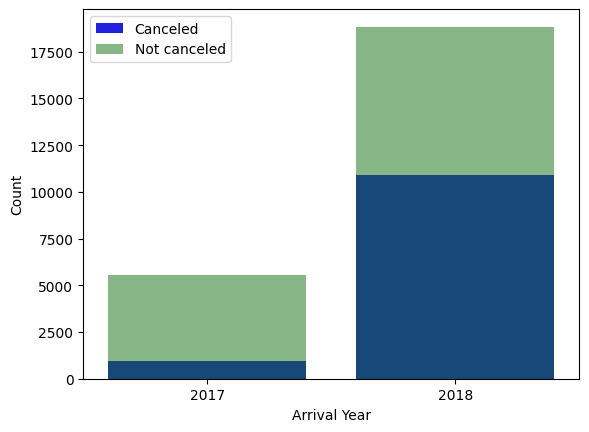

In [23]:
pivot_table1 = pd.pivot_table(data=df[df['booking_status']==1], values='booking_status', index='arrival_year', aggfunc='sum')
pivot_table0 = pd.pivot_table(data=df[df['booking_status']==0], values='booking_status', index='arrival_year', aggfunc='count')
pivot_table1.reset_index()
pivot_table0.reset_index()
sns.barplot(data=pivot_table0, x='arrival_year', y='booking_status', color='blue', label='Canceled')
sns.barplot(data=pivot_table1, x='arrival_year', y='booking_status', color='green', label='Not canceled', alpha=0.5)
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.legend()
plt.show()


Small amount of reservations was canceled in 2017. Over a half of reservations was canceled in 2018
Let's fix the data in columns that contain objects.


In [24]:
for index, row in df.iterrows():
    df.at[index, 'room_type_reserved'] = df.at[index, 'room_type_reserved'][-1]
    # Let's set all Unselected ones to NaN for now
    if type(df.at[index, 'type_of_meal_plan'])!=float:
        df.at[index, 'type_of_meal_plan'] = df.at[index, 'type_of_meal_plan'][-1]
        if df.at[index, 'type_of_meal_plan'] == 'd':
            df.at[index, 'type_of_meal_plan'] = np.nan
   
print(f"Room types: {df['room_type_reserved'].unique()}")
print(f"Meal plans: {df['type_of_meal_plan'].unique()}")
print(df['type_of_meal_plan'].value_counts())

Room types: ['1' '4' '2' '6' '5' '7' '3']
Meal plans: ['1' nan '2' '3']
type_of_meal_plan
1    27835
2     3305
3        5
Name: count, dtype: int64


Replace NaN's with most probable values

In [25]:

non_nans = df['type_of_meal_plan'].dropna().values
test = df['type_of_meal_plan'].isna()
df.loc[test, 'type_of_meal_plan'] = np.random.choice(non_nans, size=test.sum())
print(df['type_of_meal_plan'].value_counts())

type_of_meal_plan
1    32416
2     3853
3        6
Name: count, dtype: int64


Trying to get a grasp of relations between the data

<Axes: >

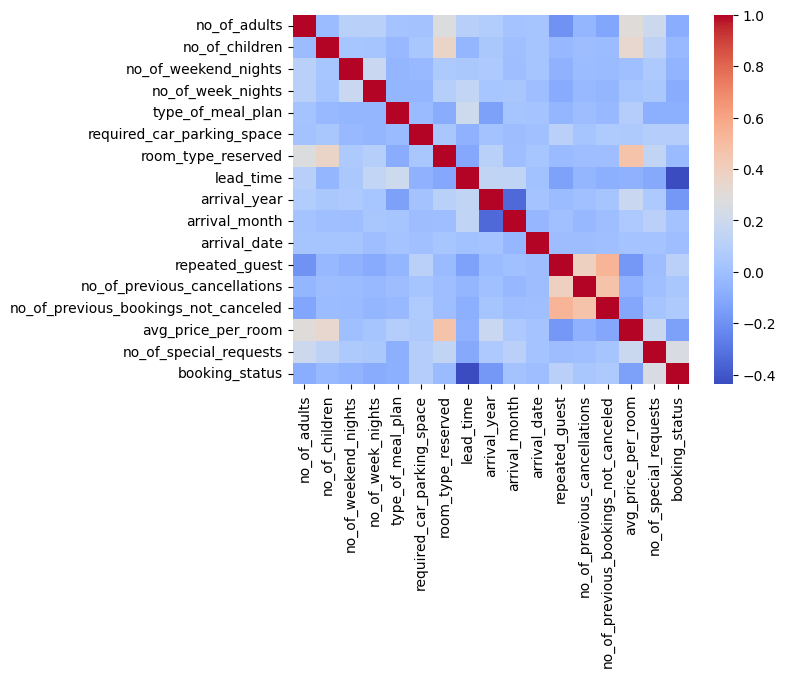

In [26]:
sns.heatmap(df.drop(columns=['Booking_ID', 'market_segment_type']).corr(), cmap='coolwarm')

In [31]:
#pivot1 = pd.pivot_table(data=df[df['booking_status']==1], values='booking_status', index='lead_time', aggfunc='sum')
#pivot2 = pd.pivot_table(data=df[df['booking_status']==0], values='booking_status', index='lead_time', aggfunc='count')
#print(pivot1)
#print(pivot2)

ValueError: Per-column arrays must each be 1-dimensional